In [ ]:
#Universidade de Pernambuco (UPE)
#Escola Politecnica de Pernambuco (Poli)
#Curso de Especializacao em Ciencia dos Dados e Analytics
#Disciplina de Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script para tratamentos de valores ausentes
#--------------------------------------------------------


# Importando as bibliotecas necessarias
import pandas
import scipy
import numpy

from pandas import read_csv

dataset = read_csv('pima-indians-diabetes.csv', header=None)

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)

print("Conhecendo os dados estatisticos dos dados carregados (describe)")
print(dataset.describe())

print("Visualizando o conjunto inicial (head) dos dados, ou mais claramente"
		"os 20 primeiros registros (head(20))")
print(dataset.head(20))

print("Quantidade de pontos que possue 0 como valor")
print((dataset[[1,2,3,4,5]] == 0).sum())

# Marcar os valores ausentes como NaN = not a number
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)

print("Realiza a contagem de valores NaN em cada coluna")
print(dataset.isnull().sum())

print("Visualizando o conjunto inicial (head) dos dados, ou mais claramente"
		"os 20 primeiros registros (head(20))")
print(dataset.head(20)) 

#Abordagems para substituicao do NaN
#usando a media (mean) mediana (median) coluna por coluna
dataset[4].fillna(dataset[4].median(), inplace=True)

#preenchendo com as ocorrencias mais próximas
#dataset.fillna(method='ffill',inplace=True)

# Removendo registros que possuem valores ausentes (NaN)
#dataset.dropna(inplace=True)

# Preenchendo os valores ausentes com base na media dos valores da coluna
# existe ainda as opcoes via mediana e valores mais frequentes
#dataset.fillna(dataset.mean(), inplace=True)

#fazendo interpolacao para encontrar os novos valores para NaN
#dataset=dataset.interpolate()

print("Mostra a quantidade de valores ausentes (NaN) de cada coluna")
print(dataset.isnull().sum())
print(dataset.shape)

print("Visualizando o conjunto inicial (head) dos dados, ou mais claramente"
		"os 20 primeiros registros (head(20))")
print(dataset.head(20))

Apresentando o shape dos dados (dimenssoes)
(32, 12)
Conhecendo os dados estatisticos dos dados carregados (describe)
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std  

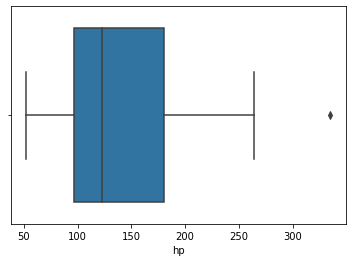

In [3]:
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)

#Realizando a remocao de valores aberrantes de atributos


#Utilizando a base de dados com caracteristicas de carros
dataset = pd.read_csv('/content/mtcars.csv')

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)

print("Conhecendo os dados estatisticos dos dados carregados (describe)")
print(dataset.describe())

print('Apresentando os primeiros registros')
print(dataset.head())

# print('Quantidade de valores zeros')
# print((dataset[['cyl','hp']] == 0).sum())

#Gerando boxplot para a caracteristia HP
sns.boxplot(data=dataset,x=dataset['hp'])

#obtendo o valor do Q1
Q1=dataset['hp'].quantile(0.25)

#obtendo o valor do Q3
Q3=dataset['hp'].quantile(0.75)

#obtendo a faixa de valores interquartil
IQR=Q3-Q1

print(Q1)

print(Q3)

print(IQR)

Lower_Whisker = Q1-1.5*IQR

Upper_Whisker = Q3+1.5*IQR

print(Lower_Whisker, Upper_Whisker)

dataset = dataset[dataset['hp']< Upper_Whisker]

print("Apresentando o shape dos dados (dimenssoes)")
print(dataset.shape)


In [ ]:
import pandas as pd
import numpy as np
 
#Realizando a discretizacao de atributos continuos
#Create a DataFrame
df1 = {
    'Name':['George','Andrea','micheal','maggie','Ravi','Xien','Jalpa','Tyieren'],    
    'Score':[63,48,56,75,32,77,85,22]
     
   }
 
 
df1 = pd.DataFrame(df1,columns=['Name','Score'])
print(df1)

''' binning or bucketing with range'''
 
bins = [0, 25, 50, 75, 100]
df1['binned'] = pd.cut(df1['Score'], bins)
print (df1)


''' binning or bucketing with labels'''
 
bins = [0, 25, 50, 75, 100]
labels =[1,2,3,4]
df1['binned'] = pd.cut(df1['Score'], bins,labels=labels)
print (df1)


In [ ]:
#Universidade de Pernambuco (UPE)
#Escola Politecnica de Pernambuco (Poli)
#Curso de Especializacao em Ciencia dos Dados e Analytics
#Disciplina de Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script que padroniza os dados para media 0 e desvio 1
#--------------------------------------------------------


# Importando as bibliotecas necessarias
import pandas
import numpy
from sklearn.preprocessing import StandardScaler

#definindo os nomes de cada coluna
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)

print("Dados originais")
print(dataframe.head(5))

#separa os dados de entrada e saida
array = dataframe.values
X = array[:,0:8] #separa os dados da primeira coluna (0) ate a penultima (8)
Y = array[:,8] #separa os dados da ultima coluna

#padroniza os dados com media 0 e desvio 1
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

print("Resumo dos dados modificados")
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

In [ ]:
#Universidade de Pernambuco (UPE)
#Escola Politecnica de Pernambuco (Poli)
#Curso de Especializacao em Ciencia dos Dados e Analytics
#Disciplina de Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script para normalizacao dos dados
#--------------------------------------------------------


# Importando as bibliotecas necessarias
import pandas
import numpy
from sklearn.preprocessing import Normalizer

#definindo os nomes de cada coluna
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)

print("Dados originais")
print(dataframe.head(5))

#separa os dados de entrada e saida
array = dataframe.values
X = array[:,0:8] #separa os dados da primeira coluna (0) ate a penultima (8)
Y = array[:,8] #separa os dados da ultima coluna

#normaliza os dados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

print("Resumo dos dados modificados")
numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])

Dados originais
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
Resumo dos dados modificados
[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [ ]:
#Universidade de Pernambuco (UPE)
#Escola Politecnica de Pernambuco (Poli)
#Curso de Especializacao em Ciencia dos Dados e Analytics
#Disciplina de Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script para a binarizacao de dados
#--------------------------------------------------------


# Importando as bibliotecas necessarias
import pandas
import numpy
from sklearn.preprocessing import Binarizer

#definindo os nomes de cada coluna
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataframe = pandas.read_csv('pima-indians-diabetes.csv', names=names)

print("Dados originais")
print(dataframe.head(5))

#separa os dados de entrada e saida
array = dataframe.values
X = array[:,0:8] #separa os dados da primeira coluna (0) ate a penultima (8)
Y = array[:,8] #separa os dados da ultima coluna

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

print("Resumo dos dados modificados")
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])

In [ ]:
#Universidade de Pernambuco (UPE)
#Escola Politecnica de Pernambuco (Poli)
#Curso de Especializacao em Ciencia dos Dados e Analytics
#Disciplina de Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script para re-escala de dados
#--------------------------------------------------------


# Importando as bibliotecas necessarias
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv


#definindo os nomes de cada coluna
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataframe = read_csv('pima-indians-diabetes.csv', names=names)

print("Dados originais")
print(dataframe.head(5))

#separa os dados de entrada e saida
array = dataframe.values
X = array[:,0:8] #separa os dados da primeira coluna (0) ate a penultima (8)
Y = array[:,8] #separa os dados da ultima coluna

#realiza a re-escala dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe[['preg', 'plas']] = scaler.fit_transform(dataframe[['preg', 'plas']])
rescaledX = scaler.fit_transform(X)

print("Resumo dos dados modificadoss")
numpy.set_printoptions(precision=3)
print(rescaledX)

Dados originais
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
Resumo dos dados modificadoss
[[0.353 0.744 0.59  ... 0.501 0.234 0.483]
 [0.059 0.427 0.541 ... 0.396 0.117 0.167]
 [0.471 0.92  0.525 ... 0.347 0.254 0.183]
 ...
 [0.294 0.608 0.59  ... 0.39  0.071 0.15 ]
 [0.059 0.633 0.492 ... 0.449 0.116 0.433]
 [0.059 0.467 0.574 ... 0.453 0.101 0.033]]


In [ ]:
2#Universidade de Pernambuco (UPE)
#Escola Politecnica de Pernambuco (Poli)
#Curso de Especializacao em Ciencia dos Dados e Analytics
#Disciplina de Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script para converter dados categoricos em binarios
#--------------------------------------------------------


# Importando as bibliotecas necessarias
import pandas
import numpy

# Define the headers since the data does not have any
nomes = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',
                  header=None, names=nomes, na_values="?" )

print("Dados originais")
print(df.head())

print(df.dtypes) 

print("selecionar apenas as colunas que sao do tipo objeto/categorigos")
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.head())

print("verificar a existencia de dados ausentes")
print(obj_df[obj_df.isnull().any(axis=1)])

print("realiza a contagem de dados de um atributo")
print(obj_df["num_doors"].value_counts())

print("realiza o preenchimento NaN com um valor especifico")
obj_df = obj_df.fillna({"num_doors": "four"})

#conversao de categorigo para binario
print(pandas.get_dummies(obj_df, columns=["drive_wheels"]).head())

dfb = pandas.get_dummies(obj_df, columns=["drive_wheels"]);

print(pandas.get_dummies(dfb, columns=["body_style"]).head())

